In [45]:
import numpy as np
from skimage import io
import util as ut
import util_verkehrsschilderkenner as ut2
import math
import matplotlib.pyplot as plt
from skimage import util as skutil
import cv2
from skimage.transform import rotate


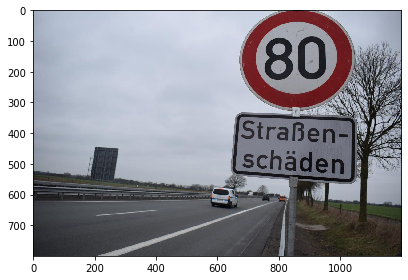

In [46]:
img_1 = io.imread("Verkehrsschilderkenner/80_test.jpg")
# img_1 = io.imread("Verkehrsschilderkenner/Verkehrsschilder.jpg")

img_ref = ut.rgb2gray(io.imread("Verkehrsschilderkenner/50_ref.jpg"))
img_ref_1 = ut.rgb2gray(io.imread("Verkehrsschilderkenner/30_ref.jpg"))
img_ref_2 = ut.rgb2gray(io.imread("Verkehrsschilderkenner/50_ref.jpg"))
img_ref_3 = ut.rgb2gray(io.imread("Verkehrsschilderkenner/80_ref.jpg"))

ut.printImage(img_1,False)

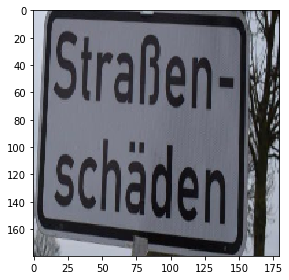

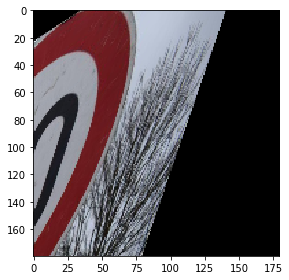

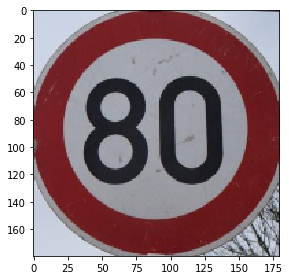

In [47]:
cropped_img = ut2.get_sign(img_1, version=2)
for entry in cropped_img:
    ut.printImage(entry)

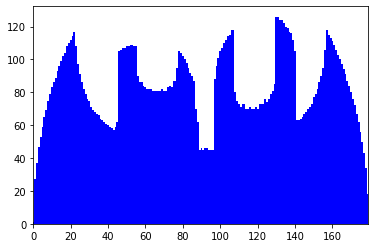

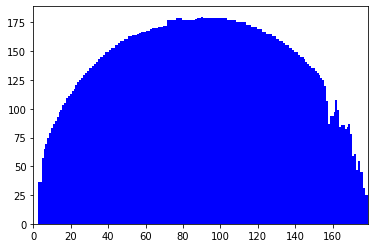

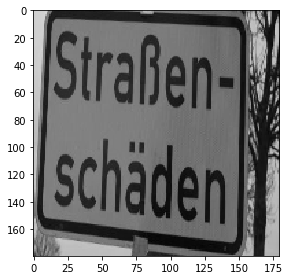

92.0


c:\users\mrheartbeat\desktop\2d-comp-vision\venv\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


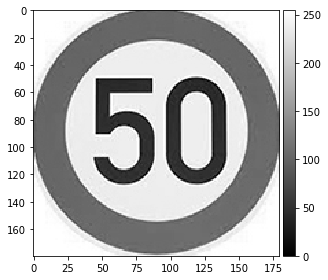

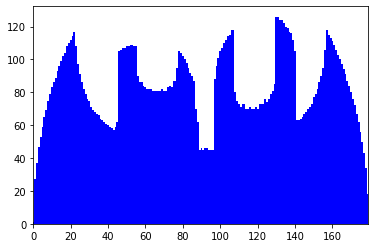

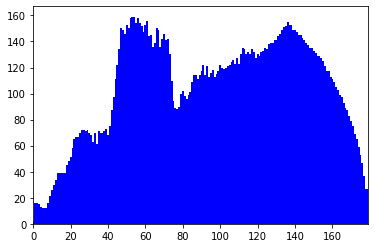

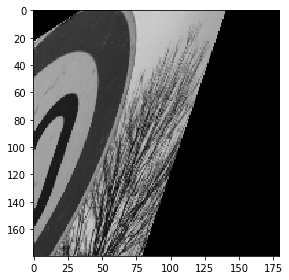

53.0


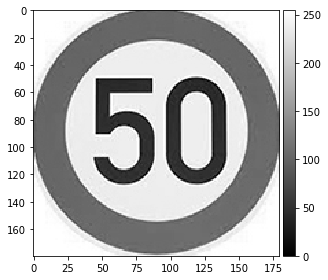

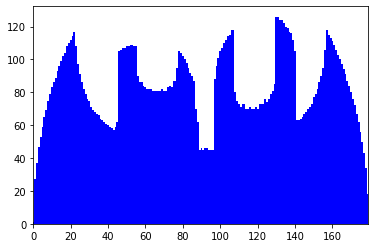

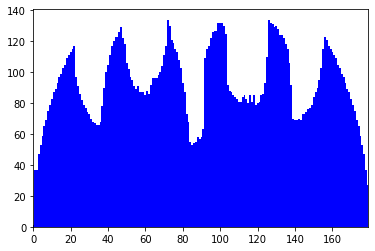

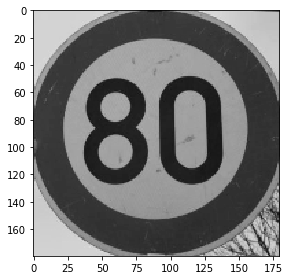

38.0


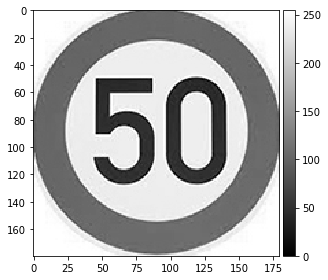

In [48]:
for entry in cropped_img:
    result = ut2.match_signs(entry, img_ref, version=3)
    #print("Found " + str(result[0]) + " matches from " + str(result[1]) + "!")
    ut.printImage(ut.rgb2gray(entry).astype('uint8'))
    print(result)
    ut.printImage(img_ref)

Trying to detect sign:


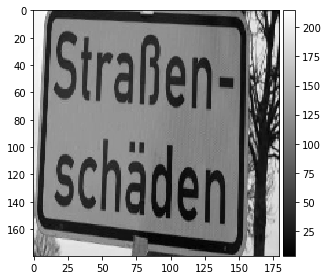

No sign detected

Trying to detect sign:


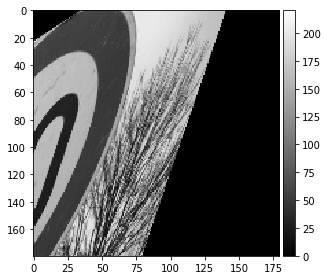

No sign detected

Trying to detect sign:


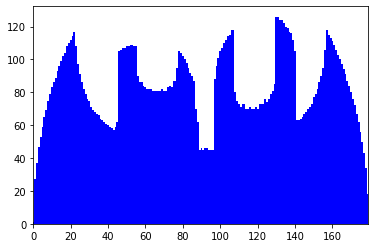

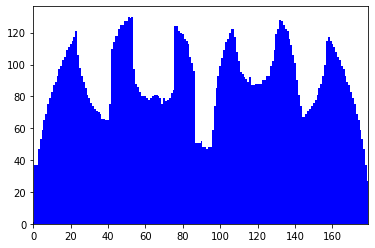

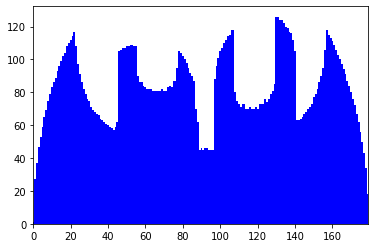

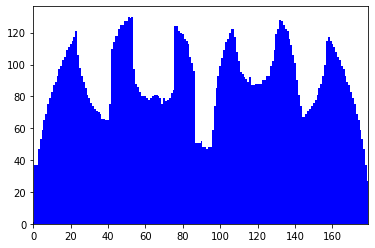

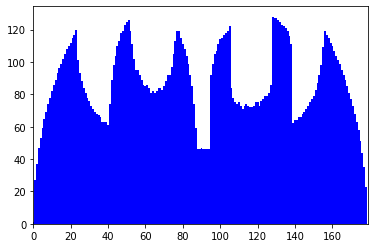

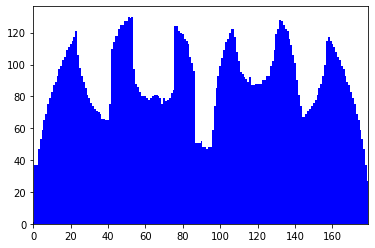

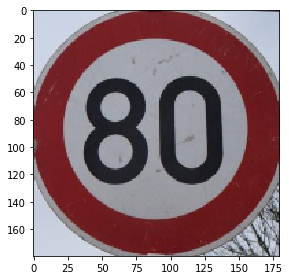

29.0
Sign detected:


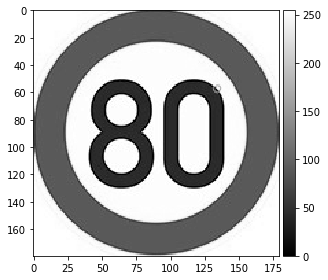

In [49]:
for entry in cropped_img:
    print("Trying to detect sign:")
    result, angle = ut2.match_signs(entry, img_ref_1, version=2)
    result_2, angle_2 = ut2.match_signs(entry, img_ref_2, version=2)
    result_3, angle_3 = ut2.match_signs(entry, img_ref_3, version=2)
    tmp_set = {result: (30, angle), result_2: (50, angle_2), result_3: (80, angle_3)}
    tmp = [result, result_2, result_3]
    tmp.sort()
    if tmp[2] < 0.65:
        ut.printImage(ut.rgb2gray(entry))
        print("No sign detected\n")
        continue

    if tmp[2] > tmp[1] + 0.1:
        ut.printImage(entry)
        print("Sign detected:")
        if tmp_set[tmp[2]][0] == 30:
            ut.printImage(img_ref_1)
        elif tmp_set[tmp[2]][0] == 50:
            ut.printImage(img_ref_2)
        if tmp_set[tmp[2]][0] == 80:
            ut.printImage(img_ref_3)
        continue

    tmp_img = rotate(entry, -tmp_set[tmp[2]][1][0][0], False)
    tmp_img = cv2.normalize(tmp_img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    result = ut2.match_signs(tmp_img, img_ref, version=3)
    result_2 = ut2.match_signs(tmp_img, img_ref_2, version=3)
    result_3 = ut2.match_signs(tmp_img, img_ref_3, version=3)

    ut.printImage(entry.astype('uint8'))
    tmp = [result, result_2, result_3]
    print(min(tmp))

    if min(tmp) < 50:
        print("Sign detected:")
        if min(tmp) == result:
            ut.printImage(img_ref_1)
        elif min(tmp) == result_2:
            ut.printImage(img_ref_2)
        if min(tmp) == result_3:
            ut.printImage(img_ref_3)
    else:
        print("Sign detected, but probabaly not a template\n")

    #print("Found " + str(result[0]) + " matches from " + str(result[1]) + "!")